In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori

In [2]:
df = pd.read_csv("groceries.csv")


In [3]:
df.head()

,Member_number,Date,itemDescription
0,1619052826499,10/22/2012,citrus fruit
1,1679031673299,10/03/2010,tropical fruit
2,1634042851699,07/07/2011,whole milk
3,1656022021999,03/13/2010,pip fruit
4,1612011328599,09/07/2013,other vegetables


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    260 non-null    int64 
 1   Date             260 non-null    object
 2   itemDescription  260 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    260 non-null    int64         
 1   Date             260 non-null    datetime64[ns]
 2   itemDescription  260 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.2+ KB


In [8]:
Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

In [9]:
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

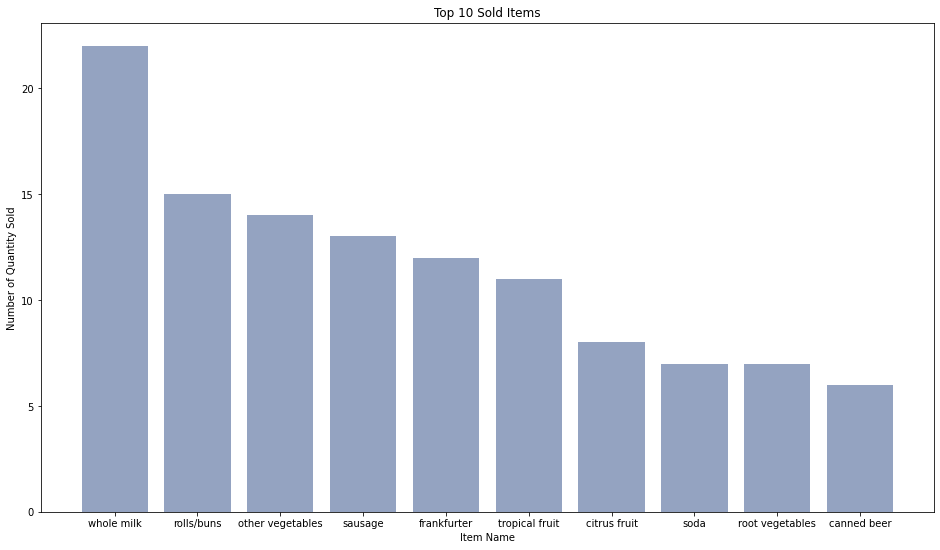

In [13]:
plt.figure(figsize=(16,9))

plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

plt.xticks(x_pos, bars)

plt.show()

In [14]:
df_date=df.set_index(['Date'])

In [15]:
df_date

,Member_number,itemDescription
Date,,
2012-10-22,1619052826499,citrus fruit
2010-10-03,1679031673299,tropical fruit
2011-07-07,1634042851699,whole milk
2010-03-13,1656022021999,pip fruit
2013-09-07,1612011328599,other vegetables
...,...,...
2010-08-19,1606041259699,ham
2014-02-11,1612020387199,other vegetables
2012-04-06,1648092066299,other vegetables


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

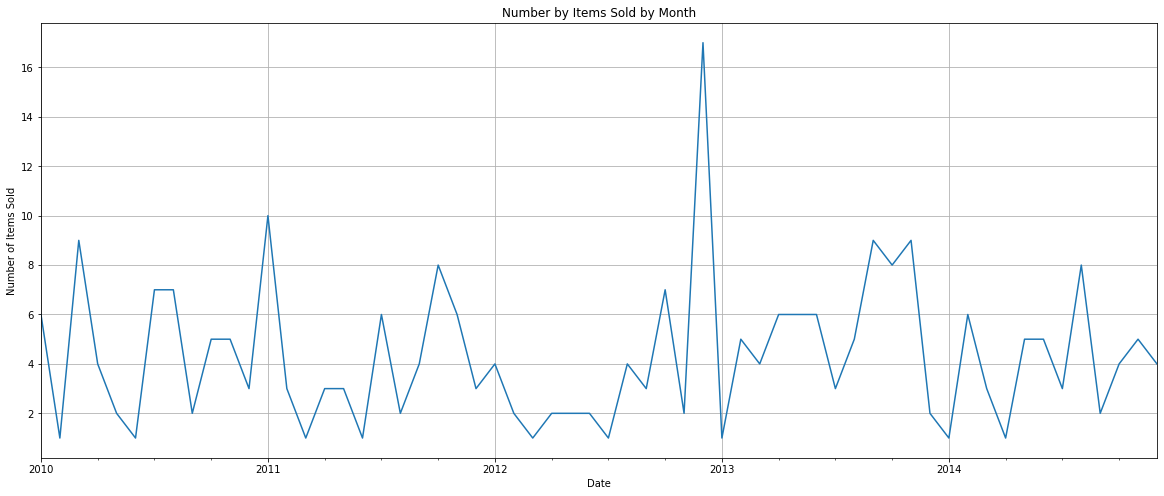

In [16]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")


In [17]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() 
cust_level

,Member_number,itemDescription
183,1699101035699,specialty bar
100,1698011240799,frankfurter
98,1697072644899,whole milk
74,1697062110699,baking powder
67,1696092655099,whipped/sour cream
...,...,...
207,1602022916699,sugar
222,1601120712199,bottled beer
159,1601010217699,chewing gum
254,1600122428599,shopping bags


In [18]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

In [20]:
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2)
results = list(rules)

In [21]:
results

[RelationRecord(items=frozenset({'frozen potato products', 'bathroom cleaner'}), support=0.00510204081632653, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bathroom cleaner'}), items_add=frozenset({'frozen potato products'}), confidence=1.0, lift=98.00000000000001), OrderedStatistic(items_base=frozenset({'frozen potato products'}), items_add=frozenset({'bathroom cleaner'}), confidence=0.5, lift=98.00000000000001)]),
 RelationRecord(items=frozenset({'liquor (appetizer)', 'bathroom cleaner'}), support=0.00510204081632653, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bathroom cleaner'}), items_add=frozenset({'liquor (appetizer)'}), confidence=1.0, lift=196.00000000000003), OrderedStatistic(items_base=frozenset({'liquor (appetizer)'}), items_add=frozenset({'bathroom cleaner'}), confidence=1.0, lift=196.00000000000003)]),
 RelationRecord(items=frozenset({'citrus fruit', 'beef'}), support=0.00510204081632653, ordered_statistics=[OrderedStatistic(items_base=frozen

In [22]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

In [23]:
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [24]:
resultsinDataFrame.nlargest(n=10, columns="Lift")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
1,bathroom cleaner,liquor (appetizer),0.005102,1.0,196.000000
97,processed cheese,snack products,0.005102,1.0,196.000000
0,bathroom cleaner,frozen potato products,0.005102,1.0,98.000000
18,brown bread,candy,0.005102,0.5,98.000000
19,brown bread,frozen meals,0.005102,0.5,98.000000
61,detergent,flour,0.005102,0.5,98.000000
71,frozen potato products,liquor (appetizer),0.005102,0.5,98.000000
30,butter,yogurt,0.005102,1.0,65.333333
34,candy,pork,0.005102,1.0,65.333333
36,candy,specialty bar,0.005102,1.0,65.333333


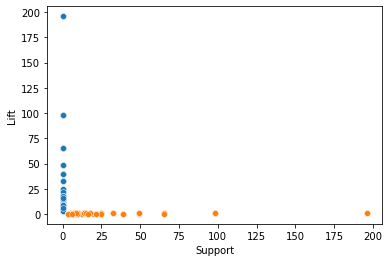

In [25]:
sns.scatterplot(x = "Support", y = "Lift", data = resultsinDataFrame);
sns.scatterplot(x = "Lift", y = "Confidence", data = resultsinDataFrame);